In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import sklearn.cross_validation as CV
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV

from lightgbm import LGBMClassifier

/home/krikunovalexey/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [29]:
RANDOM_STATE = 1512

# Load and preprocess the data

In [4]:
df = pd.read_csv("train.csv")

In [5]:
X_unscaled, y_ = df[df.columns[:-1]], df['y']
min_max_scaler = preprocessing.StandardScaler()
X_ = min_max_scaler.fit_transform(X_unscaled)
df2 = pd.DataFrame(X_, columns=df.columns[:-1])

In [6]:
y_ = y_.as_matrix().reshape((1105, 1))

In [7]:
df2.describe()

,feature-0,feature-1,feature-2,feature-3,feature-4,feature-5,feature-6,feature-7,feature-8,feature-9,...,feature-1514,feature-1515,feature-1516,feature-1517,feature-1518,feature-1519,feature-1520,feature-1521,feature-1522,feature-1523
count,1.105000e+03,1.105000e+03,1.105000e+03,1.105000e+03,1.105000e+03,1.105000e+03,1.105000e+03,1.105000e+03,1.105000e+03,1.105000e+03,...,1.105000e+03,1.105000e+03,1.105000e+03,1.105000e+03,1.105000e+03,1.105000e+03,1.105000e+03,1.105000e+03,1.105000e+03,1.105000e+03
mean,1.434247e-16,-9.053592e-16,-1.615098e-16,-4.272600e-16,7.192186e-15,5.229603e-17,-3.269883e-16,-2.676592e-16,3.262348e-16,3.760692e-16,...,5.191423e-16,-9.203297e-17,2.257872e-16,-4.812704e-16,-4.124403e-17,-8.129244e-16,-7.421916e-16,-4.001324e-16,-1.838650e-17,2.538442e-16
std,1.000453e+00,1.000453e+00,1.000453e+00,1.000453e+00,1.000453e+00,1.000453e+00,1.000453e+00,1.000453e+00,1.000453e+00,1.000453e+00,...,1.000453e+00,1.000453e+00,1.000453e+00,1.000453e+00,1.000453e+00,1.000453e+00,1.000453e+00,1.000453e+00,1.000453e+00,1.000453e+00
min,-7.053718e-01,-1.837649e+00,-3.226550e+00,-2.378447e+00,-3.158620e+00,-5.544192e-01,-1.948138e+00,-1.909228e+00,-1.570259e+00,-1.751417e+00,...,-4.435228e+00,-2.918446e+00,-4.848142e+00,-5.770166e+00,-7.356416e+00,-6.464318e+00,-5.337989e+00,-4.505849e+00,-3.971525e+00,-3.410555e+00
25%,-3.578951e-01,-7.012435e-01,-7.265741e-01,-7.475250e-01,-5.990244e-01,-2.979976e-01,-4.970281e-01,-7.061821e-01,-7.198065e-01,-7.223001e-01,...,-5.623194e-01,-3.773092e-01,-5.197094e-01,-4.874340e-01,-4.880606e-01,-4.457424e-01,-4.548227e-01,-4.314880e-01,-4.491226e-01,-4.114749e-01
50%,-1.904229e-01,-1.886059e-01,-2.454100e-02,-1.386394e-01,-1.007275e-01,-1.715992e-01,-1.819737e-01,-1.826980e-01,-2.213800e-01,-1.924221e-01,...,5.117395e-02,2.037167e-01,6.799576e-02,1.233569e-01,1.535134e-01,1.609785e-01,1.643235e-01,1.825452e-01,1.543961e-01,1.826317e-01
75%,6.162547e-02,5.798737e-01,7.457282e-01,5.972684e-01,4.515874e-01,1.674121e-02,3.008929e-01,5.777789e-01,4.986620e-01,5.497978e-01,...,6.333252e-01,6.669497e-01,6.324632e-01,6.449090e-01,6.072456e-01,5.952042e-01,6.136688e-01,6.290139e-01,6.605855e-01,6.561198e-01
max,1.471719e+01,6.184554e+00,3.944963e+00,5.712028e+00,4.780912e+00,1.529942e+01,1.154528e+01,5.872578e+00,6.058919e+00,6.279296e+00,...,2.564417e+00,2.681901e+00,2.640261e+00,2.658611e+00,2.776772e+00,2.811386e+00,2.881865e+00,2.803789e+00,2.813856e+00,2.767153e+00


# ANN

In [8]:
from sklearn.metrics import roc_auc_score

import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt

/home/krikunovalexey/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Helper functions and classes

In [9]:
def linear_activation(vector, weights, bias):
    return tf.matmul(vector, weights) + bias

In [10]:
class BatchGenerator():
    def __init__(self, X, y, batch_size):
        self.X = X
        self.Y = y
        self.batch_size = batch_size
        self.n_batch = (len(X) // batch_size)
        self.index = 0

    def get_batch(self):
        batch_range = range(self.index, (self.index+1)*self.batch_size)
        if self.index == self.n_batch:
            batch_range = range(self.index, len(self.X))
        self.index += 1

        return self.X[batch_range], self.Y[batch_range]

    def resetIndex(self):
        self.index = 0

### NN layers
As far this is ad-hoc solution for test task layer composing fuctions includes code for regularization

In [11]:
class One2OneLayer(object):
    def __init__(self, input_layer, weight_init=None):
        input_size = input_layer.get_shape()[1].value

        o2o_weights = tf.Variable(tf.random_normal([input_size]))
        o2o_output = input_layer * o2o_weights

        self.output = o2o_output
        self.input = input_layer
        self.output = o2o_output
        self.weights = o2o_weights
    
class DenseLayer():
    def __init__(self, input_layer, layer_size, activation):
        input_size = input_layer.get_shape()[1].value
        
        low=-np.sqrt(6. / (input_size + layer_size))
        high=np.sqrt(6. / (input_size + layer_size))
        
        weights = tf.Variable(tf.random_uniform([input_size, layer_size], 
                                               minval=low, maxval=high))
        bias = tf.Variable(tf.random_uniform([layer_size], 
                                             minval=low, maxval=high))

        z = linear_activation(input_layer, weights, bias)
        output = activation(z)
        
        self.input = input_layer
        self.bias = bias
        self.output = output
        self.weights = weights
        
class SoftmaxLayer():
    """
        This class describes the output layer of NN
        with softmax loss function
    """
    def __init__(self, input_layer, layer_size, y):
        input_size = input_layer.get_shape()[1].value

        low=-np.sqrt(6. / (input_size + layer_size))
        high=np.sqrt(6. / (input_size + layer_size))
        
        weights = tf.Variable(tf.random_uniform([input_size, layer_size], 
                                               minval=low, maxval=high))
        bias = tf.Variable(tf.random_uniform([layer_size], 
                                             minval=low, maxval=high))

        z = linear_activation(input_layer, weights, bias)
        cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=z))

        # Evaluate model
        correct_predictions = tf.equal(tf.argmax(z, 1), tf.argmax(y, 1))
        self.accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))
        
        self.input = input_layer
        self.bias = bias
        self.output = z
        self.weights = weights
        
        self.cost = cost
        self.y = y


In [12]:
class DeepFeatureSelectionNN():
    def __init__(self, X, Y, layers_dimentions=100, n_layers=5, activation=tf.nn.sigmoid,
                 lambda1=0.01, lambda2=1.0, alpha1=0.001, alpha2=1.0):
        self.X = X
        self.Y = Y
    
        #Calculate shapes
        n_sample, n_feat = X.shape
        n_classes =  Y.shape[1]
        if n_classes == 1:
            enc = OneHotEncoder()
            self.Y = enc.fit_transform(Y).todense()
            n_classes = self.Y.shape[1]
    
        #Init input layers
        self.input_X = tf.placeholder("float32", shape=(None, n_feat), name="input_X")
        self.input_y = tf.placeholder("float32", shape=(None, n_classes), name="input_Y")
        
        #Add one2one, dense and softmax layers
        self.hidden_layers = []
        self.hidden_layers.append(One2OneLayer(self.input_X))
        
        dims = []
        if type(layers_dimentions) != list:
            dims = [layers_dimentions for k in range(n_layers)]
        else:
            dims = layers_dimentions
        
        for layer_size in dims:
            input_hidden = self.hidden_layers[-1].output if self.hidden_layers else self.input_X
            self.hidden_layers.append(DenseLayer(input_hidden, layer_size, activation=activation))
            
        self.output_layer = SoftmaxLayer(self.hidden_layers[-1].output, n_classes, self.input_y)
        self.hidden_layers.append(self.output_layer)
        
        #Collect weights from layers
        w = self.hidden_layers[0].weights
        sqr_frob_norm = [tf.norm(l.weights, 'euclidean') ** 2 for l in self.hidden_layers[1:]]
        l1_norm = [tf.norm(l.weights, 1) for l in self.hidden_layers[1:]]
        
        #Precalculate regularization terms
        regularization1 = lambda1*((1.0-lambda2) * 0.5 * tf.norm(w) ** 2 + lambda2 * tf.norm(w, 1))
        regularization2 = alpha1*((1.0-alpha2) * 0.5 * tf.add_n(sqr_frob_norm) +  lambda1 * tf.add_n(l1_norm))
        
        #Calculate cost function
        self.cost = self.output_layer.cost + regularization1 + regularization2
    
    
    def train(self,lerning_rate=0.01, epochs=1000, batch_size=100, 
              verbose=True, print_step=100, random_state=441, fit_mode=False):
        
        if not fit_mode:
            X_train, X_test, Y_train, Y_test = CV.train_test_split(self.X, 
                                                                   self.Y, 
                                                                   random_state=random_state)
        else:
            X_train, X_test, Y_train, Y_test = self.X, self.X, self.Y, self.Y
        
        GDoptimizer = tf.train.AdamOptimizer(lerning_rate)\
                              .minimize(self.cost)
        
        self.accuracy = self.output_layer.accuracy
        
        s = tf.Session()
        self.s = s
        s.run(tf.global_variables_initializer())
        
        batch_generator = BatchGenerator(X_train, Y_train, batch_size)
        n_batch = batch_generator.n_batch
        
        self.losses, self.losses_test, self.train_accs, self.test_accs = [], [], [], []
        
        for i in range(epochs):
            batch_generator.resetIndex()
            for j in range(n_batch + 1):
                x_batch, y_batch = batch_generator.get_batch()
                s.run(GDoptimizer, feed_dict={self.input_X : x_batch, self.input_y: y_batch})

                
                
            self.train_accs.append(s.run(self.output_layer.accuracy,
                                         feed_dict={self.input_X: X_train, self.input_y: Y_train}))
            self.losses.append(s.run(self.cost,
                                        feed_dict={self.input_X: X_train, self.input_y: Y_train}))
            
            if not fit_mode:
                self.losses_test.append(s.run(self.cost,
                                               feed_dict={self.input_X: X_test, self.input_y: Y_test}))
                self.test_accs.append(s.run(self.output_layer.accuracy,
                                               feed_dict={self.input_X: X_test, self.input_y: Y_test}))

            if verbose and i % print_step == 0:
                print('epoch {}: loss = {}'.format(i, self.losses[-1]))
                print("Train accuracy:", self.train_accs[-1])
                print("train auc:", roc_auc_score(Y_train, s.run(self.output_layer.output, 
                                                                 {self.input_X: X_train})))
                if not fit_mode:
                    print('loss_test = {}'.format(self.losses_test[-1]))
                    print("Test accuracy:", self.test_accs[-1])
                    print("test auc:", roc_auc_score(Y_test, s.run(self.output_layer.output, 
                                                                   {self.input_X: X_test})))
        
        self.selected_ws = s.run(self.hidden_layers[0].weights)
        if verbose:
            print("Final train accuracy:", self.train_accs[-1])
            if not fit_mode:
                print("Final test accuracy:", self.test_accs[-1])

In [14]:
dfs_nn = DeepFeatureSelectionNN(X_, y_, [1024, 512, 256, 128], activation=tf.nn.tanh)

In [19]:
%%time
dfs_nn.train(0.01, 200, 100, print_step=20, random_state=RANDOM_STATE, fit_mode=False)

epoch 0: loss = 12.335762977600098
Train accuracy: 0.42270532
train auc: 0.5570016000449136
loss_test = 12.29890251159668
Test accuracy: 0.46931407
test auc: 0.5552440858744702
epoch 20: loss = 1.186618685722351
Train accuracy: 0.91183573
train auc: 0.9564338648102402
loss_test = 1.624991536140442
Test accuracy: 0.7978339
test auc: 0.838951182825106
epoch 40: loss = 0.42534834146499634
Train accuracy: 0.97343
train auc: 0.9826065293060857
loss_test = 1.0182617902755737
Test accuracy: 0.8267148
test auc: 0.8571721591686039
epoch 60: loss = 0.2551431655883789
Train accuracy: 0.98671496
train auc: 0.9981367898046261
loss_test = 0.8462868928909302
Test accuracy: 0.84476537
test auc: 0.8937508546424175
epoch 80: loss = 0.3640727996826172
Train accuracy: 0.9710145
train auc: 0.98845932517404
loss_test = 0.9523890614509583
Test accuracy: 0.833935
test auc: 0.8069875564063995
epoch 100: loss = 0.19317230582237244
Train accuracy: 0.9963768
train auc: 0.9990315517628565
loss_test = 1.00932705402

Text(0,0.5,'LOSS')

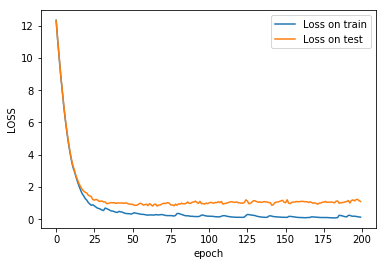

In [21]:
h1, = plt.plot(dfs_nn.losses, label="Loss on train")
h2, = plt.plot(dfs_nn.losses_test, label="Loss on test")

plt.legend(handles=[h1, h2])

plt.xlabel("epoch")
plt.ylabel("LOSS")

Из графика выше видно, что довольно быстро начинается переобучения модели, поэтому лучше остановиться заранее или добавить регуляризацию. Разумеется, выбор количества эпох и борьба с оверфитингом должно вестись не просто выборомточки визуально на граффике, но в данном случае у меня уже не хватило времени провести полноценный анализ.

Далее запускаем обучение модели с параметром fit_mode=True, что говорит алгортму использовать всю выборку, не разбивая её на тренировочную и валидирующую.

In [30]:
%%time
dfs_nn.train(0.01, 100, 100, print_step=20, random_state=RANDOM_STATE, fit_mode=True)

epoch 0: loss = 11.857841491699219
Train accuracy: 0.67873305
train auc: 0.7844595137633112
epoch 20: loss = 0.9123934507369995
Train accuracy: 0.9122172
train auc: 0.9286407474382158
epoch 40: loss = 0.46091023087501526
Train accuracy: 0.94660634
train auc: 0.9757725537472373
epoch 60: loss = 0.33467352390289307
Train accuracy: 0.98190045
train auc: 0.9680610809724735
epoch 80: loss = 0.3283129036426544
Train accuracy: 0.9909502
train auc: 0.9934699618243922
Final train accuracy: 0.999095
CPU times: user 13min 51s, sys: 1min, total: 14min 51s
Wall time: 2min 19s


# Evaluation

### Find feature importaince using different methods

In [31]:
y = y_.ravel()

In [32]:
rf_clf = RandomForestClassifier(n_jobs=2, random_state=RANDOM_STATE)
lgbm_clf = LGBMClassifier(random_state=RANDOM_STATE)

rf_clf.fit(X_, y);
lgbm_clf.fit(X_, y);

In [33]:
rf_feature_importances = list(zip(df2.columns[:-1], rf_clf.feature_importances_))
lgbm_feature_importances = list(zip(df2.columns[:-1],lgbm_clf.feature_importances_))
dfs_feature_importances = list(zip(df2.columns[:-1], dfs_nn.selected_ws))

rf_feature_importances.sort(key=lambda x: x[1], reverse=True)
lgbm_feature_importances.sort(key=lambda x: x[1], reverse=True)
dfs_feature_importances.sort(key=lambda x: x[1], reverse=True)

### Evaluation models

In [34]:
svc_clf = SVC(probability=True)
CV.cross_val_score(svc_clf, X_, y, cv=5, scoring='neg_log_loss').mean()

-0.2982190484129969

В следующем коде для каждого набора признаков, для модели дожен был осуществляться подбор гиперпараметров (закоменнтированный код), и вариант набора гиперпараметров должен был сохраняться вместе со значением целевой метрики. Но из-за того, что подобный подбор признаков занимал время, несовместимое с выполнением задания в срок, пришлось решить задачу частично и ограничиться кросс-валидацией.

Более того, в данном случае необходимо провести анализ результатов кросс-валидации, как минимум учитывать не только среднее, но и дисперсию результатов валидации на фолдах.

Так же, в общем случае, перебор нужно делать по числу признаков от 1 до максимального, чтобы убедиться, что выбор признаков не приводит к значительному ухудшению качества модели.

In [41]:
%%time

metrics = ['neg_log_loss', 'roc_auc']
mn, mx = 10, 150
feature_importances = [rf_feature_importances,
                      lgbm_feature_importances,
                      dfs_feature_importances]

#param_grid = [
#  {'C': [1, 10], 'kernel': ['linear']},
#  {'C': [1, 10], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
# ]

score_by_metric = {}
for metric in metrics:
    scores = []
    for fv in feature_importances:
        score = []
        for i in range(mn, mx):
            top = fv[:i]
            top_columns = [f[0] for f in top]
            X_top = df2[top_columns]
            
            m = CV.cross_val_score(svc_clf, X_top, y, cv=5, scoring=metric).mean()
            
            #grid_search = GridSearchCV(svc_clf, param_grid, scoring=metric, n_jobs=8, cv=4)
            #grid_search.fit(X_top, y_)
            #m = grid_search.best_score_ 
            
            score.append(m)
        scores.append(score)
    score_by_metric[metric] = scores

CPU times: user 24min 8s, sys: 0 ns, total: 24min 8s
Wall time: 24min 8s


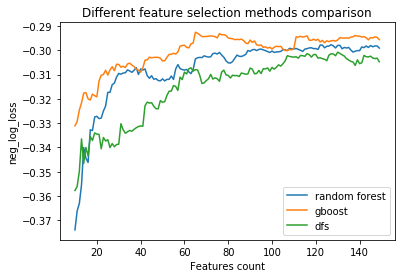

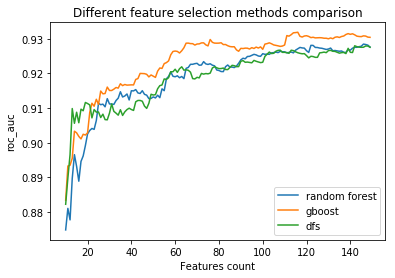

In [40]:
for metric in metrics:
    scores = score_by_metric[metric]
    labels = []
    for selection_method, score in zip(["random forest", "gboost", "dfs"], scores):
        label, = plt.plot(range(mn, mx), score, label = selection_method)
        labels.append(label)

    plt.title("Different feature selection methods comparison")
    plt.legend(handles=labels)
    plt.xlabel("Features count")
    plt.ylabel(metric)
    plt.show()

Правильно было бы так же и признаки ранжировать с использованием перебора гиперпараметров моделей отбора (Random Forest, GBoost, DFS). Но это очень затратная  по производительно операция заняла бы слишком много времени на выполнение.

In [49]:
roc_aucs = score_by_metric['roc_auc']

#Здесь происходит дублирование перебора осуществленного выше для построения граффиков, но так нагляднее
for selection_method, score in zip(["random forest", "gboost", "dfs"], roc_aucs):
    max_score = max(score)
    print("Maximum ROC AUC for {} feature selection is {:.3f} obtained on {} features".format(selection_method, 
                                                                                          max_score,
                                                                                          score.index(max_score) + mn))

Maximum ROC AUC for random forest feature selection is 0.928 obtained on 146 features
Maximum ROC AUC for gboost feature selection is 0.932 obtained on 116 features
Maximum ROC AUC for dfs feature selection is 0.928 obtained on 142 features


In [52]:
best_features_set = [f[0] for f in lgbm_feature_importances[:117]]

In [53]:
best_features_set

['feature-1460',
 'feature-1183',
 'feature-351',
 'feature-545',
 'feature-63',
 'feature-1025',
 'feature-602',
 'feature-973',
 'feature-214',
 'feature-358',
 'feature-889',
 'feature-226',
 'feature-382',
 'feature-369',
 'feature-584',
 'feature-687',
 'feature-868',
 'feature-101',
 'feature-460',
 'feature-881',
 'feature-1286',
 'feature-822',
 'feature-916',
 'feature-1013',
 'feature-62',
 'feature-464',
 'feature-588',
 'feature-596',
 'feature-660',
 'feature-1011',
 'feature-30',
 'feature-80',
 'feature-96',
 'feature-98',
 'feature-130',
 'feature-350',
 'feature-476',
 'feature-530',
 'feature-569',
 'feature-593',
 'feature-600',
 'feature-1001',
 'feature-1520',
 'feature-81',
 'feature-120',
 'feature-212',
 'feature-381',
 'feature-422',
 'feature-452',
 'feature-473',
 'feature-544',
 'feature-548',
 'feature-561',
 'feature-607',
 'feature-666',
 'feature-685',
 'feature-825',
 'feature-852',
 'feature-1339',
 'feature-52',
 'feature-104',
 'feature-115',
 'featu